 Neste notebook será utilizado os dados manipulados anteriormente e a partir dos mesmos serão geradas visualizações. 

## 1- Importando a base de dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('dados_arrest_NYC.csv')

In [3]:
df.head()

data_da_ocorrencia                     descricao_da_ofensa nivel_da_ofensa  \
0         2018-01-01  OFFENSES AGAINST PUBLIC ADMINISTRATION    contravencao   
1         2018-01-01             OFFENSES AGAINST THE PERSON    contravencao   
2         2018-01-01          INTOXICATED & IMPAIRED DRIVING    contravencao   
3         2018-01-01                           PETIT LARCENY    contravencao   
4         2018-01-01          INTOXICATED & IMPAIRED DRIVING    contravencao   

          bairro idade_do_infrator sexo_do_infrator raca_do_infrator  \
0      Manhattan             25-44                M            WHITE   
1      Manhattan             25-44                M   WHITE HISPANIC   
2          Bronx             25-44                M            BLACK   
3  Staten_Island             25-44                F            WHITE   
4      Manhattan             45-64                M            WHITE   

    latitude  longitude   ano  dia  mes dia_da_semana  assalto  fds  delito  
0  40.741689 -74.002986  2018    1    1        Monday        0    0       1  
1  40.741689 -74.002986  2018    1    1        Monday        0    0       1  
2  40.835900 -73.877327  2018    1    1        Monday        0    0       1  
3  40.613677 -74.158138  2018    1    1        Monday        0    0       1  
4  40.840781 -73.936245  2018    1    1        Monday        0    0       1

- Selecionando os últimos 3 anos .

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596274 entries, 0 to 596273
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   data_da_ocorrencia   596274 non-null  object 
 1   descricao_da_ofensa  596274 non-null  object 
 2   nivel_da_ofensa      596274 non-null  object 
 3   bairro               596274 non-null  object 
 4   idade_do_infrator    596274 non-null  object 
 5   sexo_do_infrator     596274 non-null  object 
 6   raca_do_infrator     596274 non-null  object 
 7   latitude             596274 non-null  float64
 8   longitude            596274 non-null  float64
 9   ano                  596274 non-null  int64  
 10  dia                  596274 non-null  int64  
 11  mes                  596274 non-null  int64  
 12  dia_da_semana        596274 non-null  object 
 13  assalto              596274 non-null  int64  
 14  fds                  596274 non-null  int64  
 15  delito           

## 2- Preparaçao dos dados


 - Convertendo a coluna " DATA_DA_OCORRENCIA "para formato datetime

In [5]:
df["data_da_ocorrencia"] = pd.to_datetime(df["data_da_ocorrencia"] )

## 3.0  Gerando algumas vizualizações.

### 3.1- Quantidade de delitos cometidos por bairros
 
 - Será criado um DataFrame delitos_concluidos_por_bairros que será utilizado neste tópico
 - Selecionando apenas os delitos concluídos

 - Criando o DataFrame delitos_concluidos_por_bairros

In [6]:
delitos_concluidos_por_bairros_df = df.bairro.value_counts().to_frame().reset_index()
delitos_concluidos_por_bairros_df.columns = ['bairro' , 'qtde_delitos']

- Visualizando a quantidade total de delitos em cada bairro

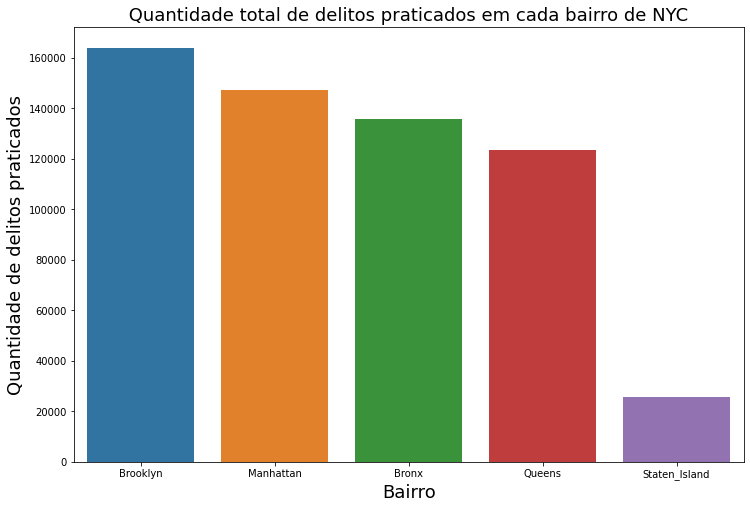

In [34]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'bairro' , y = 'qtde_delitos' , data = delitos_concluidos_por_bairros_df)
titulo = ' Quantidade total de delitos praticados em cada bairro de NYC '
plt.ylabel('Quantidade de delitos praticados', fontsize = 18)
plt.xlabel('Bairro', fontsize = 18)
plt.title(titulo, fontsize = 18)
plt.show()

 - Distribuição dos delitos cometidos de acordo com o dia do mes

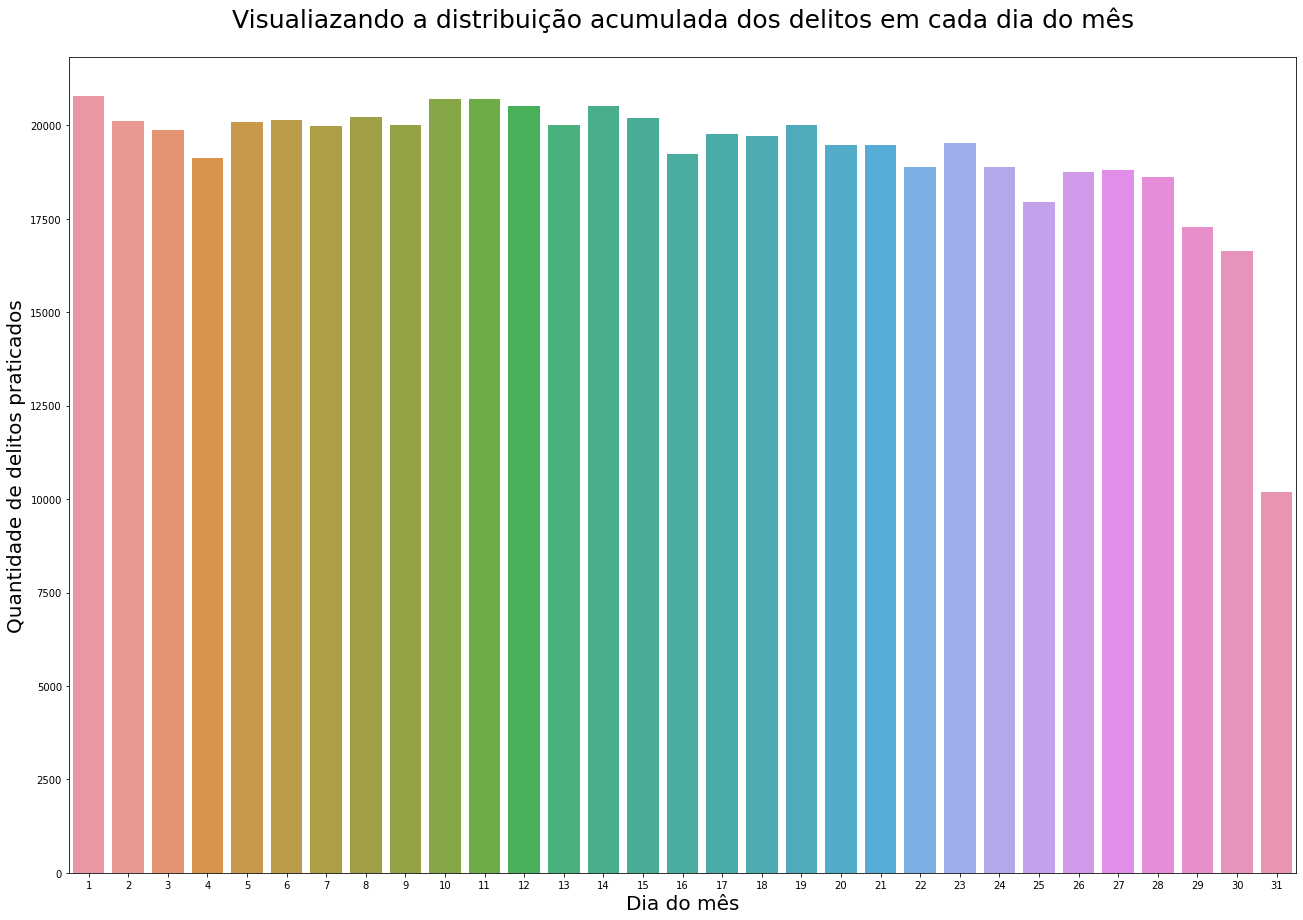

In [35]:
f, ax = plt.subplots(figsize=(22, 15))
sns.countplot(x="dia", data=df);
plt.ylabel('Quantidade de delitos praticados', fontsize = 20)
plt.xlabel('Dia do mês', fontsize = 20)
plt.title('Visualiazando a distribuição acumulada dos delitos em cada dia do mês', fontsize = 25, y=1.03)
plt.show()

 - Distribuição dos delitos por mes

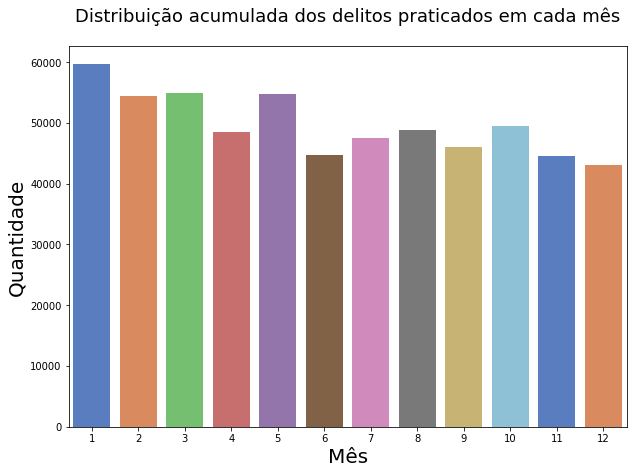

In [36]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x="mes",data=df , palette="muted")
titulo='Distribuição acumulada dos delitos praticados em cada mês'
plt.title(titulo, fontsize=18, y=1.05)
plt.ylabel('Quantidade', fontsize = 20)
plt.xlabel('Mês', fontsize = 20)
plt.show()

### 3.2- Descrição da ofensa :  tipos de delitos mais comuns

In [10]:
tipos_de_delitos = df.descricao_da_ofensa.value_counts().to_frame().reset_index()
tipos_de_delitos.columns = ['descricao_da_ofensa' , 'quantidade']

 - Visualizando os tipos de delitos mais recorrentes

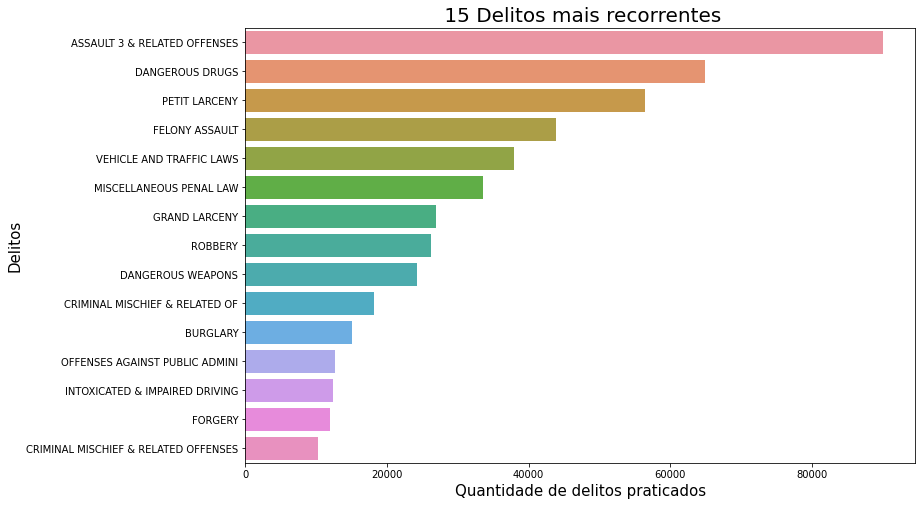

In [11]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y = 'descricao_da_ofensa' , x = 'quantidade' , data = tipos_de_delitos.head(15))
titulo=' 15 Delitos mais recorrentes'
plt.title(titulo, fontsize=20)
plt.xlabel('Quantidade de delitos praticados', fontsize = 15)
plt.ylabel('Delitos', fontsize = 15)
plt.show()

###  3.3- Visualizando a distribuicao do sexo e raça dos infratores 

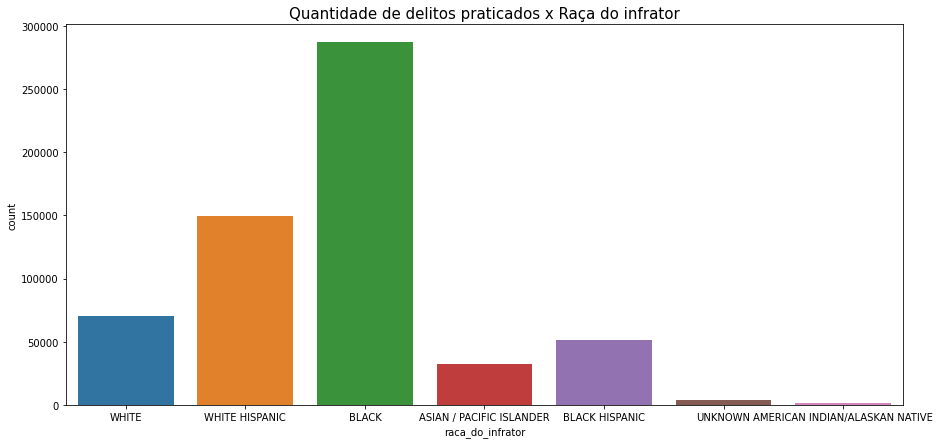

In [38]:
f, ax = plt.subplots(figsize=(15, 7))
sns.countplot( x ="raca_do_infrator", data=df)
titulo ='Quantidade de delitos praticados x Raça do infrator'
plt.title(titulo, fontsize=15)
plt.show()

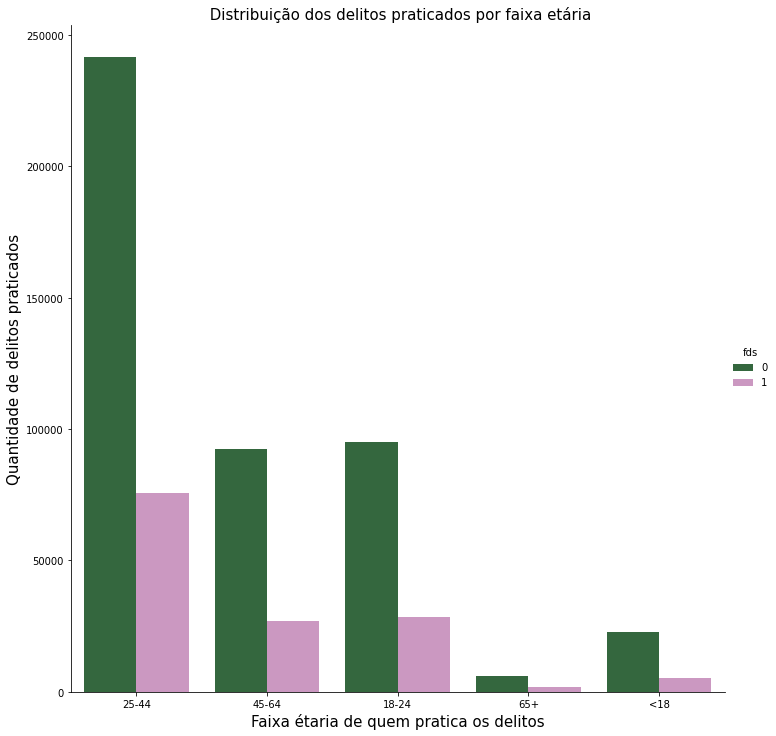

In [13]:
ax = sns.catplot(x="idade_do_infrator",hue='fds',kind="count",palette="cubehelix", data=df, height=10, aspect=1)
plt.xlabel('Faixa étaria de quem pratica os delitos' , fontsize=15)
plt.ylabel('Quantidade de delitos praticados' , fontsize=15)
titulo =" Distribuição dos delitos praticados por faixa etária"
plt.title(titulo, fontsize=15)
plt.show()

## 3.4 Visualizando em função dos crimes definidos como sendo assalto.

In [14]:
assalto = df.query('assalto == 1')[['data_da_ocorrencia','latitude','longitude','dia_da_semana','fds']]
assalto = assalto.set_index('data_da_ocorrencia')
seguro = df.query('assalto == 0')[['data_da_ocorrencia','latitude','longitude','dia_da_semana','fds']]
seguro = seguro.set_index('data_da_ocorrencia')

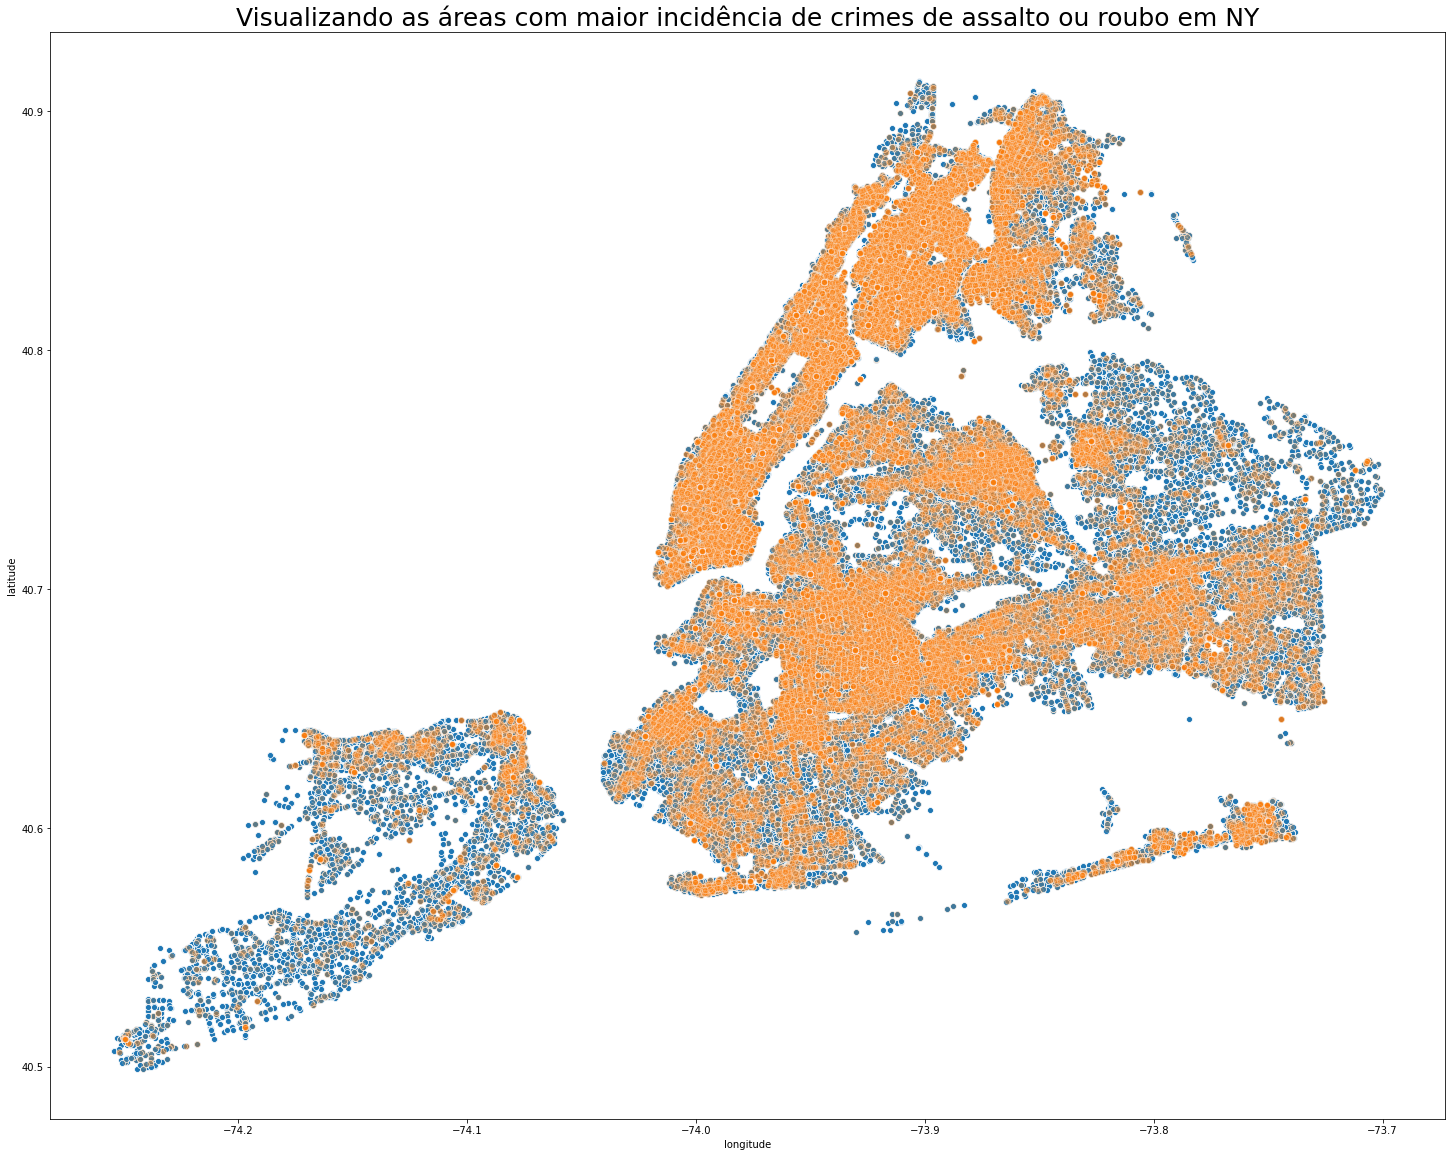

In [44]:
plt.figure(figsize=(25,20))
sns.scatterplot(x='longitude',y='latitude',data = df)
sns.scatterplot(x='longitude',y='latitude',data=assalto, alpha=0.15)
plt.title('Visualizando as áreas com maior incidência de crimes de assalto ou roubo em NY',fontsize=25)
plt.show()

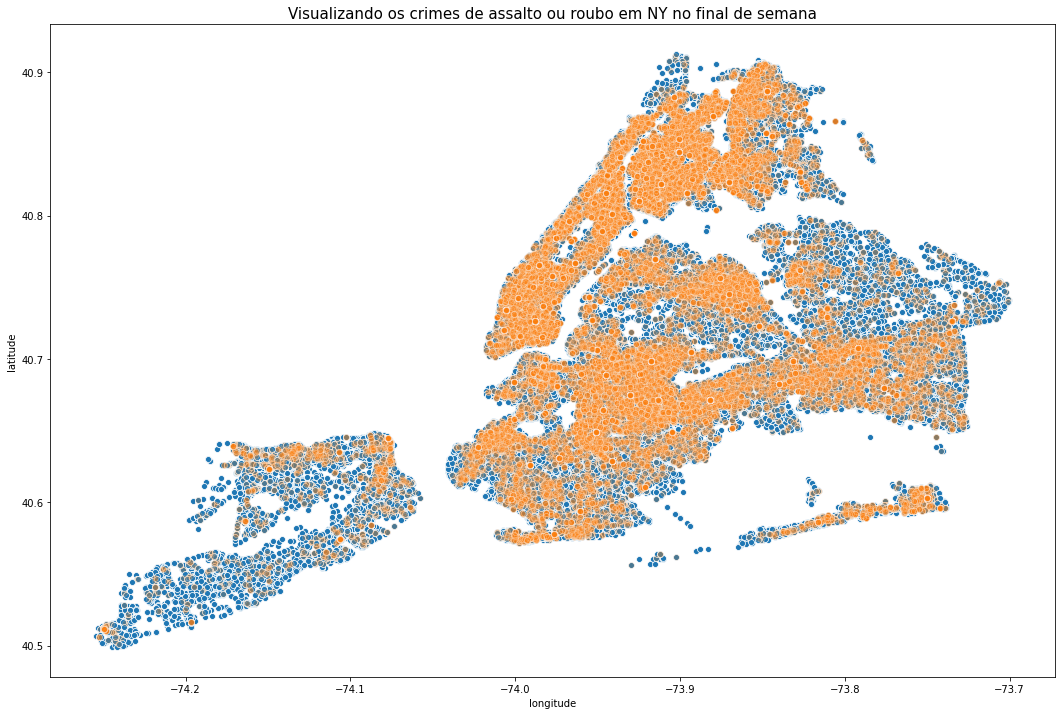

In [59]:
plt.figure(figsize=(18,12))
sns.scatterplot(x='longitude',y='latitude',data = df)
sns.scatterplot(x='longitude',y='latitude',data=assalto[assalto['fds']==1], alpha=0.2)
plt.title('Visualizando os crimes de assalto ou roubo em NY no final de semana',fontsize=15)
plt.show()

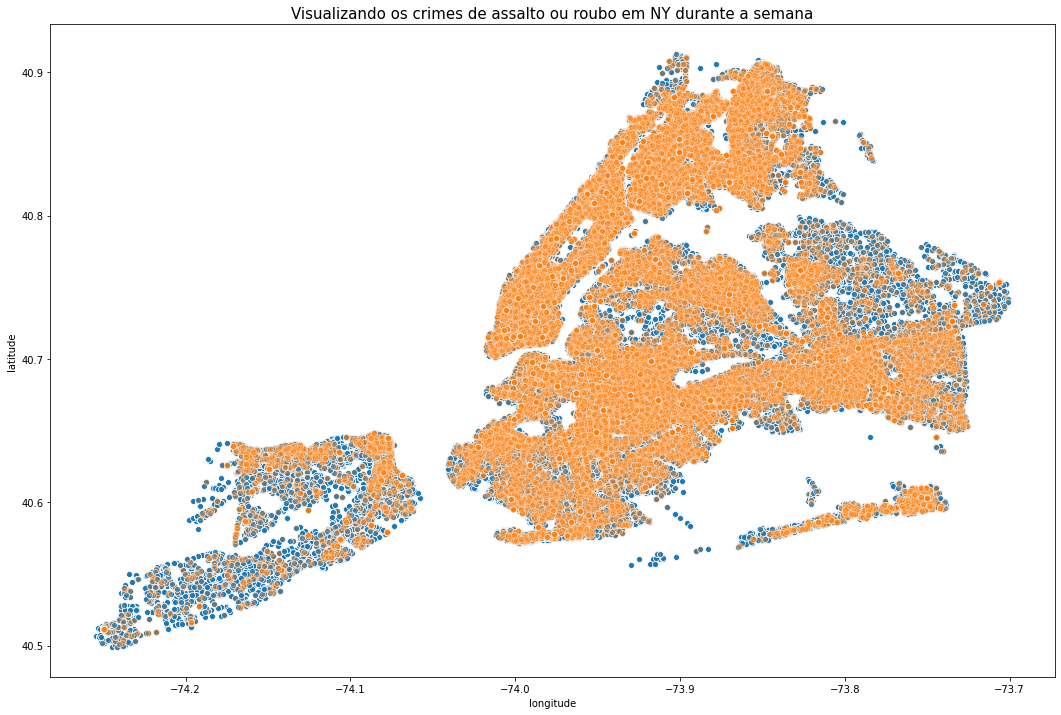

In [60]:
plt.figure(figsize=(18,12))
sns.scatterplot(x='longitude',y='latitude',data = df)
sns.scatterplot(x='longitude',y='latitude',data=assalto[assalto['fds']==0],alpha=0.2)
plt.title('Visualizando os crimes de assalto ou roubo em NY durante a semana',fontsize=15)
plt.show()

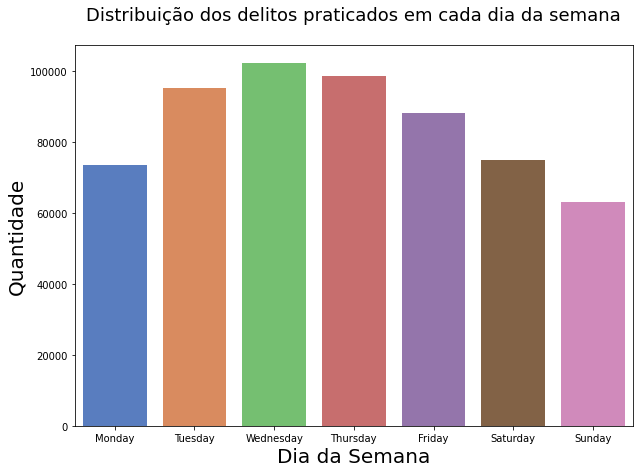

In [18]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x="dia_da_semana",data=df , palette="muted")
titulo='Distribuição dos delitos praticados em cada dia da semana'
plt.title(titulo, fontsize=18, y=1.05)
plt.ylabel('Quantidade', fontsize = 20)
plt.xlabel('Dia da Semana', fontsize = 20)
plt.show()

- Observando onde possíveis pontos que podem acontecer crimes de assalto ede acordo com o dia da semana.

Text(0.5, 1.0, 'Domingo')

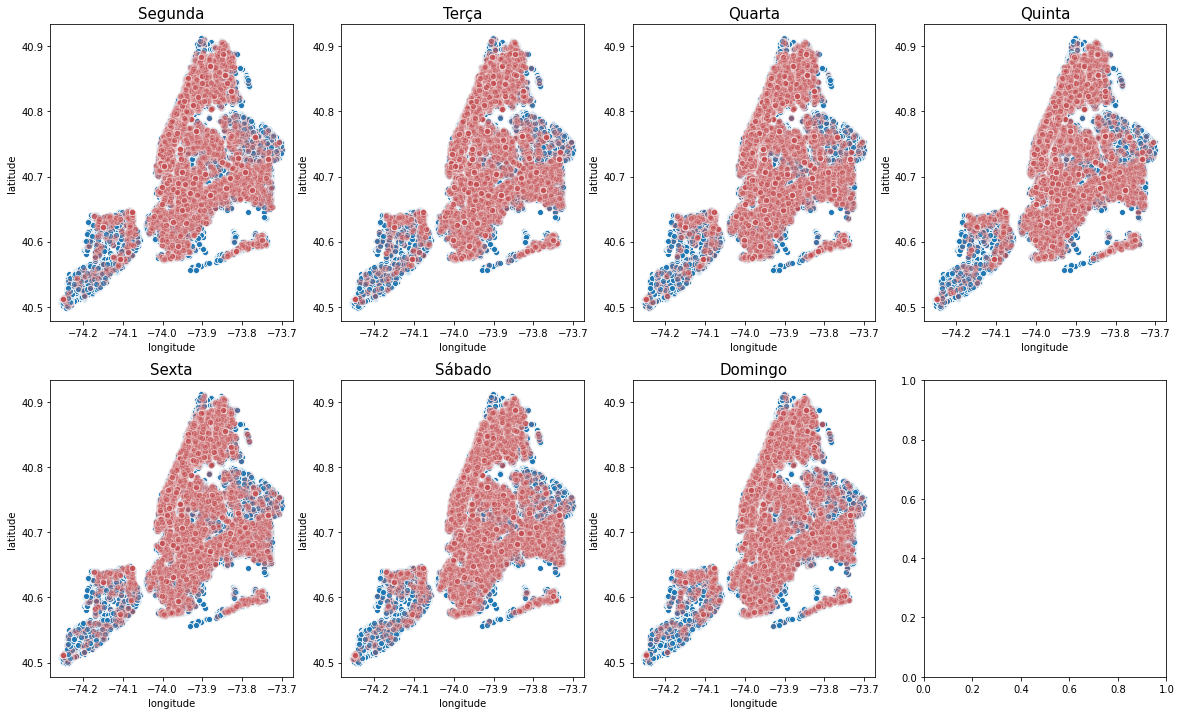

In [65]:
fig,ax = plt.subplots(2,4, figsize=(20,12))
sns.set_color_codes()

sns.scatterplot(ax=ax[0, 0],x='longitude',y='latitude',data = df)
sns.scatterplot(ax=ax[0, 0], x='longitude',y='latitude',data=assalto[assalto['dia_da_semana']=='Monday'],color="r",alpha=0.2)
ax[0,0].set_title('Segunda',fontsize=15)

sns.scatterplot(ax=ax[0, 1],x='longitude',y='latitude',data = df)
sns.scatterplot(ax=ax[0, 1], x='longitude',y='latitude',data=assalto[assalto['dia_da_semana']=='Tuesday'], color="r",alpha=0.2)
ax[0,1].set_title('Terça',fontsize=15)

sns.scatterplot(ax=ax[0, 2],x='longitude',y='latitude',data = df)
sns.scatterplot(ax=ax[0, 2], x='longitude',y='latitude',data=assalto[assalto['dia_da_semana']=='Wednesday'],color="r",alpha=0.2)
ax[0,2].set_title('Quarta',fontsize=15)

sns.scatterplot(ax=ax[0, 3],x='longitude',y='latitude',data = df)
sns.scatterplot(ax=ax[0, 3], x='longitude',y='latitude',data=assalto[assalto['dia_da_semana']=='Thursday'], color="r",alpha=0.2)
ax[0,3].set_title('Quinta',fontsize=15)

sns.scatterplot(ax=ax[1, 0],x='longitude',y='latitude',data = df)
sns.scatterplot(ax=ax[1, 0], x='longitude',y='latitude',data=assalto[assalto['dia_da_semana']=='Friday'], color="r",alpha=0.2)
ax[1,0].set_title('Sexta',fontsize=15)

sns.scatterplot(ax=ax[1, 1],x='longitude',y='latitude',data = df)
sns.scatterplot(ax=ax[1, 1], x='longitude',y='latitude',data=assalto[assalto['dia_da_semana']=='Saturday'], color="r",alpha=0.2)
ax[1,1].set_title('Sábado',fontsize=15)

sns.scatterplot(ax=ax[1, 2],x='longitude',y='latitude',data = df)
sns.scatterplot(ax=ax[1, 2], x='longitude',y='latitude',data=assalto[assalto['dia_da_semana']=='Sunday'], color="r",alpha=0.2)
ax[1,2].set_title('Domingo',fontsize=15)



## Mapeando os delitos classificados como assalto.

- Observando onde acontecem os 5 crimes selecionados como assalto e verificando a distribuição dos mesmos com relação ao periodo da semana.

Text(0.5, 1.0, 'BURGLARY')

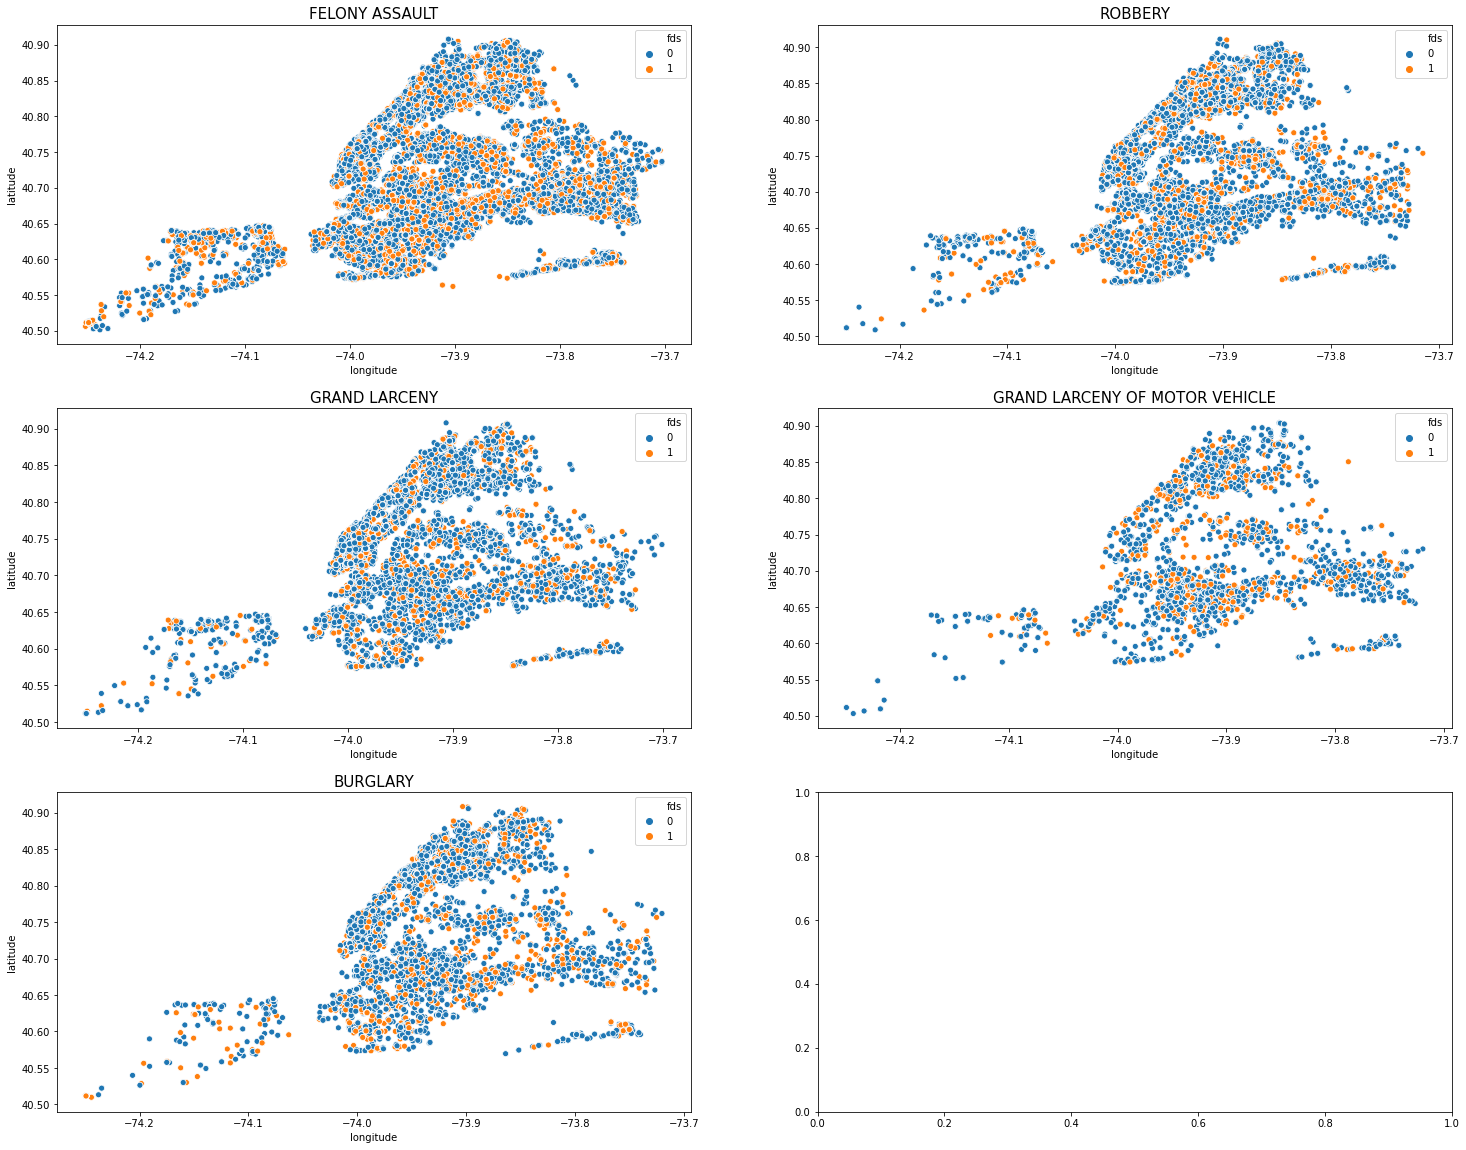

In [66]:
fig,ax = plt.subplots(3,2, figsize=(25,20))
sns.set_color_codes()


sns.scatterplot(ax=ax[0, 0], x='longitude',y='latitude',data=df[df['descricao_da_ofensa']=='FELONY ASSAULT'],color="r",hue='fds')
ax[0,0].set_title('FELONY ASSAULT',fontsize=15)

sns.scatterplot(ax=ax[0, 1], x='longitude',y='latitude',data=df[df['descricao_da_ofensa']=='ROBBERY'], color="m", hue='fds')
ax[0,1].set_title('ROBBERY',fontsize=15)

sns.scatterplot(ax=ax[1, 0], x='longitude',y='latitude',data=df[df['descricao_da_ofensa']=='GRAND LARCENY'],color="r", hue='fds')
ax[1,0].set_title('GRAND LARCENY',fontsize=15)


sns.scatterplot(ax=ax[1, 1], x='longitude',y='latitude',data=df[df['descricao_da_ofensa']=='GRAND LARCENY OF MOTOR VEHICLE'], color="g",hue='fds')
ax[1,1].set_title('GRAND LARCENY OF MOTOR VEHICLE',fontsize=15)


sns.scatterplot(ax=ax[2, 0], x='longitude',y='latitude',data=df[df['descricao_da_ofensa']=='BURGLARY'], color="g", hue='fds')
ax[2,0].set_title('BURGLARY',fontsize=15)


- Observando a distribuição os delitos classificados como assalto na cidade de NY.

Text(0.5, 1.0, 'BURGLARY')

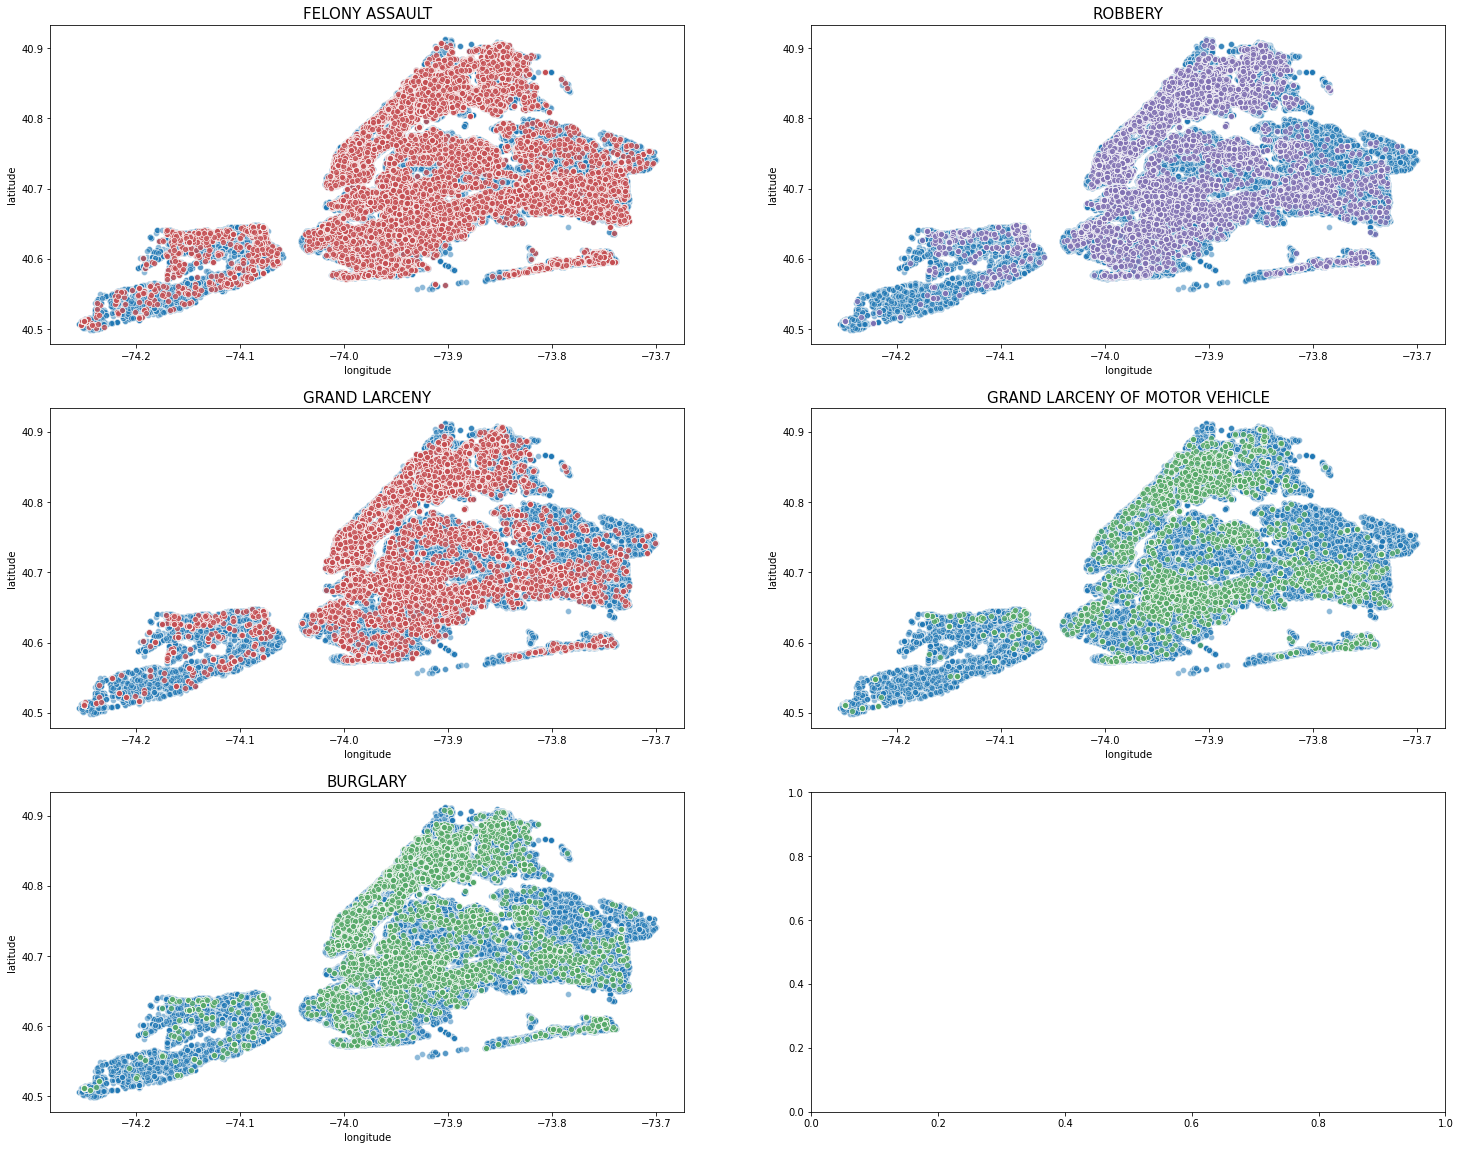

In [33]:


fig,ax = plt.subplots(3,2, figsize=(25,20))
sns.set_color_codes()

sns.scatterplot(ax=ax[0, 0],x='longitude',y='latitude',data=df, alpha=0.5)
sns.scatterplot(ax=ax[0, 0], x='longitude',y='latitude',data=df[df['descricao_da_ofensa']=='FELONY ASSAULT'],color="r",alpha=0.8)
ax[0,0].set_title('FELONY ASSAULT',fontsize=15)

sns.scatterplot(ax=ax[0, 1],x='longitude',y='latitude',data=df,alpha=0.5)
sns.scatterplot(ax=ax[0, 1], x='longitude',y='latitude',data=df[df['descricao_da_ofensa']=='ROBBERY'], color="m", alpha=0.8)
ax[0,1].set_title('ROBBERY',fontsize=15)

sns.scatterplot(ax=ax[1, 0],x='longitude',y='latitude',data=df,alpha=0.5)
sns.scatterplot(ax=ax[1, 0], x='longitude',y='latitude',data=df[df['descricao_da_ofensa']=='GRAND LARCENY'],color="r", alpha=0.8)
ax[1,0].set_title('GRAND LARCENY',fontsize=15)

sns.scatterplot(ax=ax[1, 1],x='longitude',y='latitude',data=df,alpha=0.5)
sns.scatterplot(ax=ax[1, 1], x='longitude',y='latitude',data=df[df['descricao_da_ofensa']=='GRAND LARCENY OF MOTOR VEHICLE'], color="g",alpha=0.8)
ax[1,1].set_title('GRAND LARCENY OF MOTOR VEHICLE',fontsize=15)

sns.scatterplot(ax=ax[2, 0],x='longitude',y='latitude',data=df,alpha=0.5)
sns.scatterplot(ax=ax[2, 0], x='longitude',y='latitude',data=df[df['descricao_da_ofensa']=='BURGLARY'], color="g",alpha=0.8)
ax[2,0].set_title('BURGLARY',fontsize=15)




- Salvando um arquivo pré-processado.

In [22]:
df.head()

data_da_ocorrencia                     descricao_da_ofensa nivel_da_ofensa  \
0         2018-01-01  OFFENSES AGAINST PUBLIC ADMINISTRATION    contravencao   
1         2018-01-01             OFFENSES AGAINST THE PERSON    contravencao   
2         2018-01-01          INTOXICATED & IMPAIRED DRIVING    contravencao   
3         2018-01-01                           PETIT LARCENY    contravencao   
4         2018-01-01          INTOXICATED & IMPAIRED DRIVING    contravencao   

          bairro idade_do_infrator sexo_do_infrator raca_do_infrator  \
0      Manhattan             25-44                M            WHITE   
1      Manhattan             25-44                M   WHITE HISPANIC   
2          Bronx             25-44                M            BLACK   
3  Staten_Island             25-44                F            WHITE   
4      Manhattan             45-64                M            WHITE   

    latitude  longitude   ano  dia  mes dia_da_semana  assalto  fds  delito  
0  40.741689 -74.002986  2018    1    1        Monday        0    0       1  
1  40.741689 -74.002986  2018    1    1        Monday        0    0       1  
2  40.835900 -73.877327  2018    1    1        Monday        0    0       1  
3  40.613677 -74.158138  2018    1    1        Monday        0    0       1  
4  40.840781 -73.936245  2018    1    1        Monday        0    0       1

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder = LabelEncoder()

In [25]:
dados = df.copy()

In [26]:
dados = dados.drop(columns=['nivel_da_ofensa','idade_do_infrator','sexo_do_infrator','raca_do_infrator'])

In [27]:
dados.head()

data_da_ocorrencia                     descricao_da_ofensa         bairro  \
0         2018-01-01  OFFENSES AGAINST PUBLIC ADMINISTRATION      Manhattan   
1         2018-01-01             OFFENSES AGAINST THE PERSON      Manhattan   
2         2018-01-01          INTOXICATED & IMPAIRED DRIVING          Bronx   
3         2018-01-01                           PETIT LARCENY  Staten_Island   
4         2018-01-01          INTOXICATED & IMPAIRED DRIVING      Manhattan   

    latitude  longitude   ano  dia  mes dia_da_semana  assalto  fds  delito  
0  40.741689 -74.002986  2018    1    1        Monday        0    0       1  
1  40.741689 -74.002986  2018    1    1        Monday        0    0       1  
2  40.835900 -73.877327  2018    1    1        Monday        0    0       1  
3  40.613677 -74.158138  2018    1    1        Monday        0    0       1  
4  40.840781 -73.936245  2018    1    1        Monday        0    0       1

In [28]:
dados['bairro_id'] = encoder.fit_transform(dados['bairro'])
dados['dia_da_semana_id'] = encoder.fit_transform(dados['dia_da_semana'])
dados['descricao_da_ofensa_id'] = encoder.fit_transform(dados['descricao_da_ofensa'])

In [29]:
dados = dados[['descricao_da_ofensa','descricao_da_ofensa_id','data_da_ocorrencia', 'bairro','bairro_id','latitude','longitude','ano', 'dia',
       'mes', 'dia_da_semana','dia_da_semana_id','fds','assalto']]

In [30]:
dados.head()

descricao_da_ofensa  descricao_da_ofensa_id  \
0  OFFENSES AGAINST PUBLIC ADMINISTRATION                      55   
1             OFFENSES AGAINST THE PERSON                      57   
2          INTOXICATED & IMPAIRED DRIVING                      35   
3                           PETIT LARCENY                      67   
4          INTOXICATED & IMPAIRED DRIVING                      35   

  data_da_ocorrencia         bairro  bairro_id   latitude  longitude   ano  \
0         2018-01-01      Manhattan          2  40.741689 -74.002986  2018   
1         2018-01-01      Manhattan          2  40.741689 -74.002986  2018   
2         2018-01-01          Bronx          0  40.835900 -73.877327  2018   
3         2018-01-01  Staten_Island          4  40.613677 -74.158138  2018   
4         2018-01-01      Manhattan          2  40.840781 -73.936245  2018   

   dia  mes dia_da_semana  dia_da_semana_id  fds  assalto  
0    1    1        Monday                 1    0        0  
1    1    1        Monday                 1    0        0  
2    1    1        Monday                 1    0        0  
3    1    1        Monday                 1    0        0  
4    1    1        Monday                 1    0        0

In [31]:
dados.to_csv('dados_pre_processados.csv', index=False)